<a href="https://colab.research.google.com/github/Ahmad-Yas/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture11/Ahmad_yaseen_lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Print the first image's pixel values before and after normalization
print("First training image pixel values (normalized):", train_images[0])

First training image pixel values (normalized): [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0

In [ ]:
# Verify the shape of the dataset
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing labels shape:", test_labels.shape)

# Check an example label
print("First training label:", train_labels[0])


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)
First training label: [6]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Define the class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [ ]:
# Create a figure for plotting
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

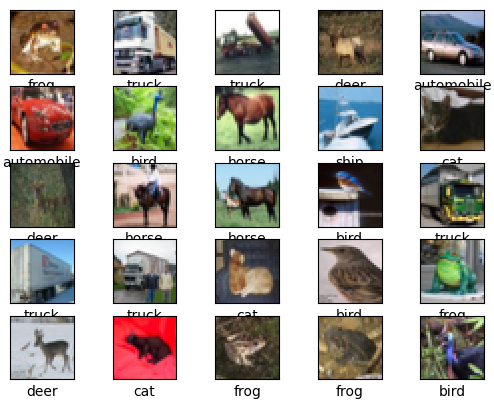

In [ ]:
# Loop through the first 25 images
for i in range(25):
    # Create a subplot for each image
    plt.subplot(5, 5, i + 1)  # 5 rows, 5 columns, current index
    plt.xticks([])  # Remove x-ticks
    plt.yticks([])  # Remove y-ticks
    plt.grid(False)  # Remove grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Show image
    plt.xlabel(class_names[train_labels[i][0]])  # Label with class name

In [ ]:
# Display the plot
plt.show()

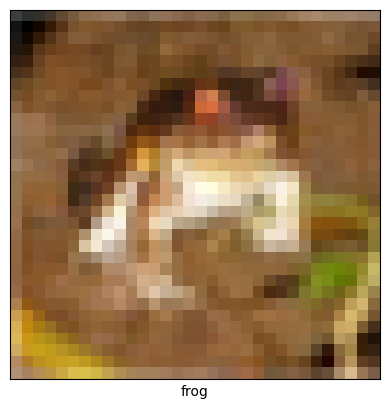

In [ ]:
import matplotlib.pyplot as plt

# Index of the image to display
i = 0  # Change this to display other images
plt.imshow(train_images[i], cmap=plt.cm.binary)  # Display the image
plt.xlabel(class_names[train_labels[i][0]])  # Add the label
plt.xticks([])  # Remove x-ticks
plt.yticks([])  # Remove y-ticks
plt.grid(False)  # Disable grid
plt.show()  # Render the plot


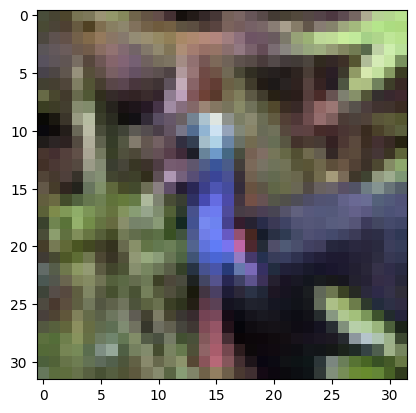

In [ ]:
# Display the image in the subplot
plt.imshow(train_images[i], cmap=plt.cm.binary)  # `i` corresponds to the current image index

In [ ]:
# Display the plot
plt.show()


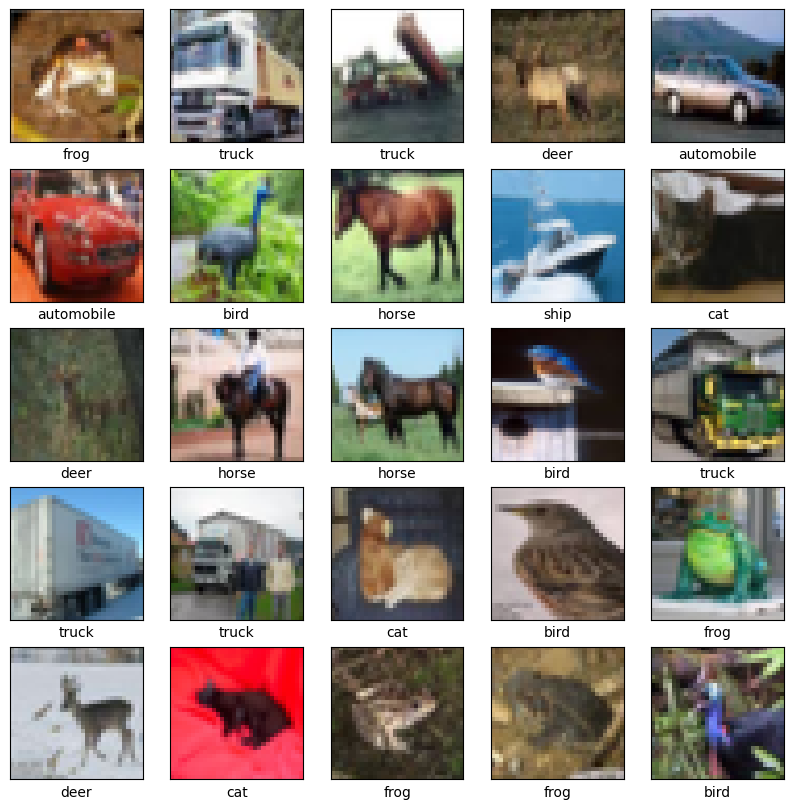

In [ ]:
import matplotlib.pyplot as plt

# Display the first 25 images with their class labels
plt.figure(figsize=(10, 10))  # Create a figure
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid
    plt.xticks([])  # Remove x-ticks
    plt.yticks([])  # Remove y-ticks
    plt.grid(False)  # Disable grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Display image
    plt.xlabel(class_names[train_labels[i][0]])  # Add class name as label
plt.show()  # Render the plot


In [ ]:
print("Shape of train_images:", train_images.shape)
print("First image array:\n", train_images[0])


Shape of train_images: (50000, 32, 32, 3)
First image array:
 [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.7058823

In [ ]:
train_images = train_images / 255.0


Text(0.5, 0, 'frog')

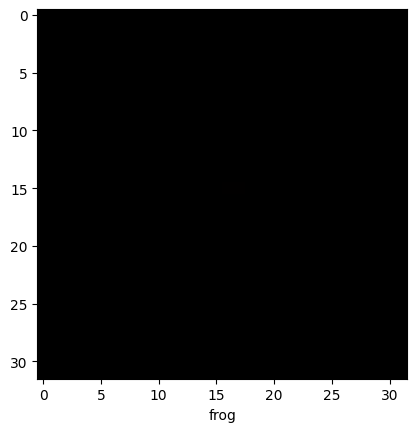

In [ ]:
plt.imshow(train_images[i], cmap=plt.cm.binary)  # Display the image
plt.xlabel(class_names[train_labels[i][0]])  # Add the label

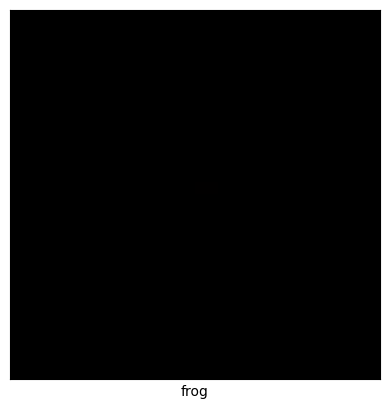

In [ ]:
import matplotlib.pyplot as plt

# Index of the image to display
i = 0  # Change this to display other images
plt.imshow(train_images[i], cmap=plt.cm.binary)  # Display the image
plt.xlabel(class_names[train_labels[i][0]])  # Add the label
plt.xticks([])  # Remove x-ticks
plt.yticks([])  # Remove y-ticks
plt.grid(False)  # Disable grid
plt.show()  # Render the plot

In [ ]:
from tensorflow import keras

# Use keras.layers to access layers
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Use them as needed
model = Sequential()
model.add(Dense(64, activation='relu'))


In [ ]:
# Create an instance of the Sequential model
model = Sequential()

In [ ]:
# Add the first convolutional layer to the model
model.add(Conv2D(
    filters=32,               # Number of filters
    kernel_size=(3, 3),       # Size of the kernel/filter
    activation='relu',        # Activation function
    input_shape=(32, 32, 3)   # Input shape (height, width, color channels)
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Flatten

# Add a Flatten layer
model.add(Flatten())

In [ ]:
from tensorflow.keras.layers import Dense

# Add a Dense layer with 64 units
model.add(Dense(units=64, activation='relu'))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(
    filters=32,               # Number of filters
    kernel_size=(3, 3),       # Size of the kernel/filter
    activation='relu',        # Activation function
    input_shape=(32, 32, 3)   # Input shape (height, width, color channels)
))

# Add a Flatten layer
model.add(Flatten())

# Add a Dense layer with 64 units
model.add(Dense(units=64, activation='relu'))

# Print the model's architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Print the architecture of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Flatten

# Add the Flatten layer
model.add(Flatten())


In [ ]:
from tensorflow.keras.layers import Dense

# Add the Dense layer
model.add(Dense(units=64, activation='relu'))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(32, 32, 3)
))

# Add a Flatten layer
model.add(Flatten())

# Add a Dense layer with 64 units
model.add(Dense(units=64, activation='relu'))

# Print the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Print the model's architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Flatten

# Add a Flatten layer
model.add(Flatten())


In [ ]:
from tensorflow.keras.layers import Dense

# Add a Dense layer with 64 units
model.add(Dense(units=64, activation='relu'))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(
    filters=32,               # Number of filters
    kernel_size=(3, 3),       # Kernel size
    activation='relu',        # Activation function
    input_shape=(32, 32, 3)   # Input shape
))

# Add a Flatten layer
model.add(Flatten())

# Add a Dense layer with 64 units
model.add(Dense(units=64, activation='relu'))

# Print the summary of the model
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Print the model's architecture summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Flatten

# Add a Flatten layer
model.add(Flatten())


In [ ]:
from tensorflow.keras.layers import Dense

# Add a Dense layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu'))